EDA_ analisis de los datasets

Se importan las librerias

In [ ]:
import pandas as pd #principal herramienta de gestion de datasets como dataframe
import numpy as np #para trabajar con arrays y algunas cuestiones estadisticas
from sklearn import preprocessing #procesamiento de detasets 
from sklearn.metrics import mean_squared_error #herramienta estadistica para medir errores
import seaborn as sns #herramienta grafica
sns.set()
import matplotlib.pyplot #herramienta grafica
import matplotlib.pyplot as plt #herramienta grafica
import warnings #evita que se llene de warnings el script
warnings.filterwarnings("ignore", category=FutureWarning) #evita que se llene de warnings el script
sns.set()
from sklearn.preprocessing import OneHotEncoder # preprocesamiento de columna
from sklearn.preprocessing import OrdinalEncoder # preprocesamiento de columna

se abren los archivos csv con pandas

In [ ]:
!git clone https://github.com/soyHenry/Datathon.git

fatal: destination path 'Datathon' already exists and is not an empty directory.


In [ ]:
df_train=pd.read_csv('Datathon/hospitalizaciones_train.csv', encoding='utf-8')
df_test=pd.read_csv('Datathon/hospitalizaciones_test.csv', encoding='utf-8')

se mira, cuantas columas hay, cuales son categóricas y cuales no, si hay nulos o valores con errores de carga o datos a normalizar

In [ ]:
df_train.shape

(410000, 15)

In [ ]:
df_test.shape

(90000, 14)

In [ ]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [ ]:
df_test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [ ]:
df_train.sample(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
282963,4,gynecology,F,Dr Sarah,6,6573,11-20,Female,Trauma,Moderate,High Blood Pressure,2,Yes,3773.910156,10
367594,3,gynecology,F,Dr Sarah,9,91808,11-20,Female,Trauma,Minor,Asthama,4,No,3467.691961,8
279712,3,radiotherapy,C,Dr John,4,4567,71-80,Other,Emergency,Moderate,High Blood Pressure,2,No,4275.739470,24
19926,3,radiotherapy,E,Dr Sam,7,47418,21-30,Male,Urgent,Moderate,Heart disease,2,Yes,4184.279098,20
399860,4,gynecology,B,Dr Sophia,1,20652,41-50,Female,Trauma,Moderate,Heart disease,6,Yes,4880.898601,9


In [ ]:
df_test.sample(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
60957,3,anesthesia,E,Dr John,5,73580,31-40,Other,Trauma,Extreme,Asthama,5,No,4255.211423
20860,3,gynecology,F,Dr Sarah,10,29726,11-20,Female,Trauma,Minor,High Blood Pressure,2,No,5522.382413
74978,3,anesthesia,E,Dr John,4,48390,61-70,Female,Urgent,Moderate,Diabetes,2,Yes,4797.509973
88646,4,gynecology,B,Dr Sarah,8,85243,11-20,Female,Trauma,Extreme,Asthama,2,No,3531.494786
42832,14,gynecology,D,Dr Nathan,10,84887,21-30,Female,Emergency,Extreme,Other,2,Yes,6945.110098


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [ ]:
df_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [ ]:
df_test.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,3.636178,5.018300,63399.156900,3.535267,4717.288655
std,2.681778,3.158507,41703.856053,2.211598,1046.877545
min,0.000000,0.000000,-3269.000000,0.000000,1710.212495
25%,2.000000,2.000000,25633.000000,2.000000,4067.375540
50%,3.000000,5.000000,58469.000000,3.000000,4624.372449
75%,4.000000,8.000000,103812.500000,4.000000,5088.489369
max,24.000000,10.000000,134037.000000,32.000000,9872.650668


Analisis por Columnas

In [ ]:
round((((df_train['Available Extra Rooms in Hospital'].value_counts())/410000)*100),0)

3     29.0
2     28.0
4     23.0
5     10.0
6      3.0
1      2.0
7      1.0
12     1.0
24     1.0
21     0.0
13     0.0
8      0.0
11     0.0
0      0.0
10     0.0
14     0.0
20     0.0
9      0.0
Name: Available Extra Rooms in Hospital, dtype: float64

In [ ]:
round((((df_train['Department'].value_counts())/410000)*100),0)

gynecology            69.0
radiotherapy          17.0
anesthesia             9.0
TB & Chest disease     5.0
surgery                1.0
Name: Department, dtype: float64

In [ ]:
round((((df_train['doctor_name'].value_counts())/410000)*100))

Dr Olivia    21.0
Dr Sarah     19.0
Dr Nathan    15.0
Dr Sophia    13.0
Dr Sam       12.0
Dr Mark      10.0
Dr John       8.0
Dr Isaac      1.0
Dr Simon      0.0
Name: doctor_name, dtype: float64

In [ ]:
round((((df_train['staff_available'].value_counts())/410000)*100))

6     9.0
10    9.0
7     9.0
3     9.0
9     9.0
8     9.0
4     9.0
5     9.0
0     9.0
1     9.0
2     9.0
Name: staff_available, dtype: float64

In [ ]:
round((((df_train['Age'].value_counts())/410000)*100))

21-30     33.0
31-40     26.0
41-50     16.0
11-20      9.0
61-70      5.0
51-60      4.0
71-80      4.0
81-90      2.0
0-10       1.0
91-100     0.0
Name: Age, dtype: float64

In [ ]:
round((((df_train['gender'].value_counts())/410000)*100))

Female    73.0
Male      23.0
Other      4.0
Name: gender, dtype: float64

In [ ]:
round((((df_train['Type of Admission'].value_counts())/410000)*100))

Trauma       62.0
Emergency    27.0
Urgent       11.0
Name: Type of Admission, dtype: float64

In [ ]:
round((((df_train['Severity of Illness'].value_counts())/410000)*100))

Moderate    56.0
Minor       26.0
Extreme     17.0
Name: Severity of Illness, dtype: float64

In [ ]:
round((((df_train['health_conditions'].value_counts())/410000)*100))

None                   33.0
Other                  19.0
High Blood Pressure    16.0
Diabetes               14.0
Asthama                12.0
Heart disease           5.0
Name: health_conditions, dtype: float64

In [ ]:
round((((df_train['Visitors with Patient'].value_counts())/410000)*100))

2     41.0
4     35.0
3     11.0
6      5.0
5      2.0
8      2.0
7      1.0
9      1.0
10     1.0
12     1.0
14     0.0
1      0.0
11     0.0
13     0.0
0      0.0
15     0.0
16     0.0
24     0.0
20     0.0
19     0.0
22     0.0
18     0.0
17     0.0
23     0.0
32     0.0
21     0.0
25     0.0
30     0.0
Name: Visitors with Patient, dtype: float64

In [ ]:
round((((df_train['Insurance'].value_counts())/410000)*100))

Yes    83.0
No     17.0
Name: Insurance, dtype: float64

In [ ]:
round((((df_train['Admission_Deposit'].value_counts())/410000)*100))

4735.103575    0.0
4309.102793    0.0
4422.538518    0.0
3890.540820    0.0
4631.568040    0.0
              ... 
3597.749816    0.0
3599.941284    0.0
4701.460052    0.0
6424.548269    0.0
4329.046412    0.0
Name: Admission_Deposit, Length: 409682, dtype: float64

In [ ]:
df_train['Admission_Deposit'].min()

1654.005148

In [ ]:
df_train['Admission_Deposit'].max()

10104.72639

In [ ]:
round((((df_train['Stay (in days)'].value_counts())/410000)*100))

9     25.0
8     23.0
10    11.0
7      8.0
6      4.0
11     3.0
5      2.0
22     2.0
23     2.0
24     2.0
21     2.0
25     1.0
20     1.0
26     1.0
19     1.0
18     1.0
27     1.0
28     1.0
29     1.0
17     1.0
32     1.0
30     1.0
31     1.0
12     1.0
33     1.0
34     1.0
16     1.0
35     1.0
36     0.0
37     0.0
15     0.0
13     0.0
38     0.0
14     0.0
4      0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
3      0.0
49     0.0
50     0.0
51     0.0
Name: Stay (in days), dtype: float64

In [ ]:
df_train['Stay (in days)'].min()

3

In [ ]:
df_train['Stay (in days)'].max()

51

Cambio de la columna label a categórica

In [ ]:
df=df_train.copy()

In [ ]:
def transf_label(df):
    lista_dias=df['Stay (in days)']
    lista_estancia=[]
    for i in lista_dias:
        if i <=8: 
            i=0
        elif i>8:
            i=1
        lista_estancia.append(i)
    array_estancia=np.array(lista_estancia)
    array_estancia.reshape(1,-1)
    array_estancia.shape
    df['estancia']=array_estancia
    df.drop(columns=['Stay (in days)'], inplace=True)
    return df


In [ ]:
transf_label(df)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [ ]:
df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1


CAMBIO DE LAS COLUMNAS DE CATEGORICAS A NUMERICAS - para poder aplicar un analisis de correlacion

In [ ]:
le = preprocessing.LabelEncoder()
df['Insurance'] = le.fit_transform(df['Insurance'])
df['health_conditions'] = le.fit_transform(df['health_conditions'])
df['Type of Admission'] = le.fit_transform(df['Type of Admission'])
df['gender'] = le.fit_transform(df['gender'])
df['doctor_name'] = le.fit_transform(df['doctor_name'])
df['Ward_Facility_Code'] = le.fit_transform(df['Ward_Facility_Code'])
df['Department'] = le.fit_transform(df['Department'])


In [ ]:
enc = OrdinalEncoder()
df['Age'] = enc.fit_transform(df[['Age']])
df['Severity of Illness'] = enc.fit_transform(df[['Severity of Illness']])

In [ ]:
#Se realiza 2 copias para dos analisis de correlación posteriores
df2=df.copy()
df3=df.copy()

In [ ]:
df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,2,3,8,0,33070,4.0,0,1,0.0,1,4,1,2966.408696,0
1,4,2,1,8,2,34808,3.0,0,1,1.0,2,2,0,3554.835677,1
2,2,2,1,8,8,44577,2.0,0,1,0.0,1,2,1,5624.733654,0
3,4,2,3,4,7,3695,3.0,0,2,2.0,4,4,0,4814.149231,0
4,2,1,4,2,10,108956,7.0,1,1,2.0,1,2,0,5169.269637,1


In [ ]:
corr=df.corr()
print(corr['estancia'])

In [ ]:
print(corr['estancia'])

Available Extra Rooms in Hospital    0.053894
Department                          -0.173021
Ward_Facility_Code                  -0.074337
doctor_name                         -0.172526
staff_available                      0.002883
patientid                           -0.000532
Age                                  0.229657
gender                               0.193878
Type of Admission                    0.006233
Severity of Illness                  0.017030
health_conditions                   -0.002568
Visitors with Patient               -0.009529
Insurance                           -0.001063
Admission_Deposit                   -0.016650
estancia                             1.000000
Name: estancia, dtype: float64


In [ ]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

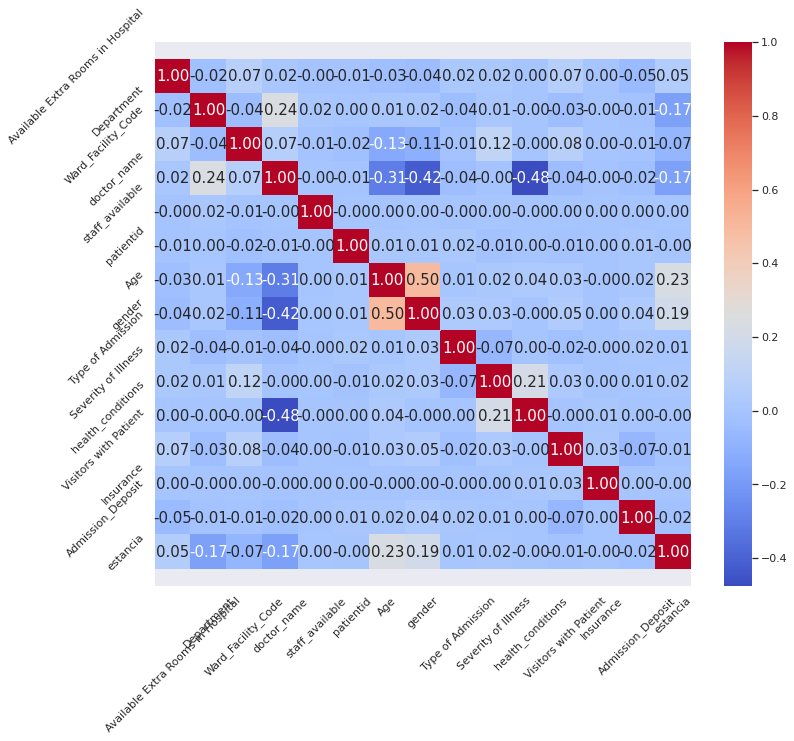

In [ ]:
plot_corre_heatmap(corr)

TODAS LAS CORRELACIONES SON MUY BAJAS= EN BASE A ESTE ANALISIS DE CORRELACION SOLO TOMARÍAMOS LAS COLUMNAS GENDER Y AGE

Se realiza un ensayo en el que se extran el 33% de los valores que poseen None en la columna health condition 

In [ ]:
df2['health_conditions'].unique()

array([1, 2, 4, 5, 0, 3])

In [ ]:
df2.drop(df2[df2['health_conditions'] == 'None'].index, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  int64  
 2   Ward_Facility_Code                 410000 non-null  int64  
 3   doctor_name                        410000 non-null  int64  
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  float64
 7   gender                             410000 non-null  int64  
 8   Type of Admission                  410000 non-null  int64  
 9   Severity of Illness                410000 non-null  float64
 10  health_conditions                  410000 non-null  int64  
 11  Visitors with Patient              4100

In [ ]:
corr2=df2.corr()

In [ ]:
print(corr2['estancia'])

Available Extra Rooms in Hospital    0.053894
Department                          -0.173021
Ward_Facility_Code                  -0.074337
doctor_name                         -0.172526
staff_available                      0.002883
patientid                           -0.000532
Age                                  0.229657
gender                               0.193878
Type of Admission                    0.006233
Severity of Illness                  0.017030
health_conditions                   -0.002568
Visitors with Patient               -0.009529
Insurance                           -0.001063
Admission_Deposit                   -0.016650
estancia                             1.000000
Name: estancia, dtype: float64


In [ ]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

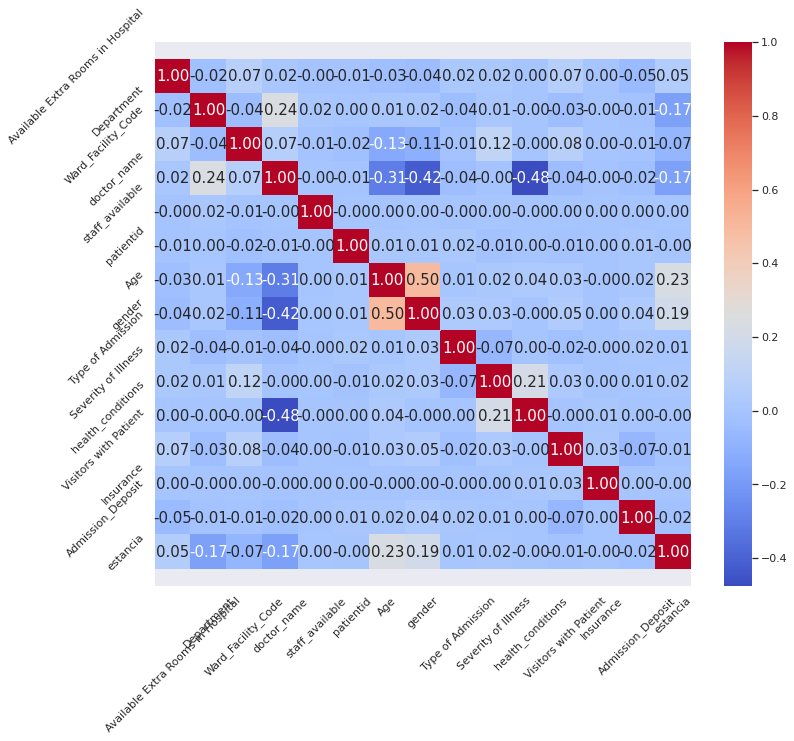

In [ ]:
plot_corre_heatmap(corr2)

TODAS LAS CORRELACIONES DAN MUY BAJAS, se decide utilizar otro método ya que la correlacion de pearson no funciona tan bien para variables discretas.

In [ ]:
#Por esta razón se realiza un analisis con otra herramienta: 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
selector = SelectKBest(mutual_info_classif,k=2)
#selector = SelectKBest(mutual_info_classif,k=4)
#selector = SelectKBest(mutual_info_classif,k=10)
X = df.drop(columns=["estancia"])
y = df[['estancia']]
selector.fit(X,y)
scores = selector.scores_
list(X.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Available Extra Rooms in Hospital',
 'Department',
 'Ward_Facility_Code',
 'doctor_name',
 'staff_available',
 'patientid',
 'Age',
 'gender',
 'Type of Admission',
 'Severity of Illness',
 'health_conditions',
 'Visitors with Patient',
 'Insurance',
 'Admission_Deposit']

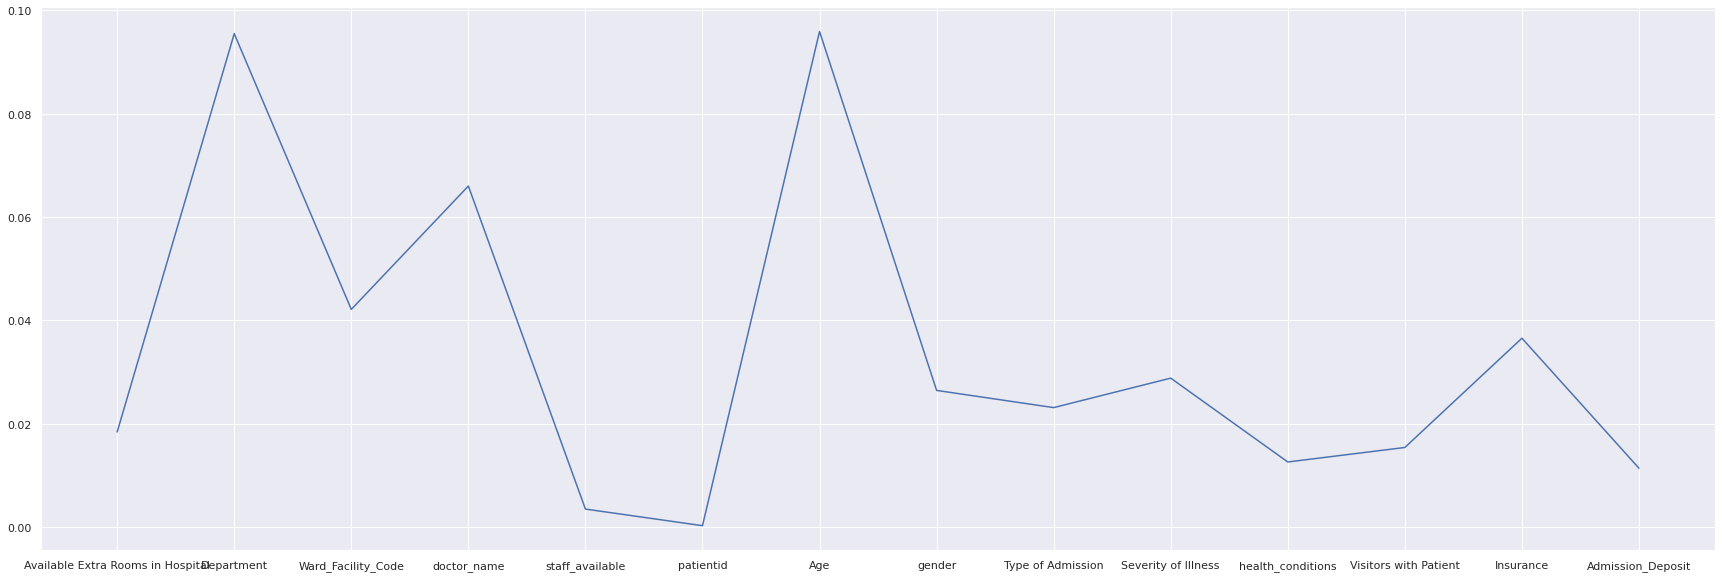

In [ ]:
plt.rcParams["figure.figsize"] = [30,10]
plt.plot(scores)
plt.xticks(np.arange(14),list(X.columns));

## IMPORTANTE_CONCLUSIONES

- todas las correlaciones son muy bajas
- las columnas que más correlacion presentan son: 
	- department
	- doctors_name
	- Age
	- gender
(a priori estas variables no deberían presentar una correlación por sentido lógico del caso, analizando que hay otras columnas que podrían, intuitivamente, tener mayor correlacion, como grado de la enfermedad, tipo o si su ingreso fue por urgencias, pero sin embargo estas ultimas no muestran correlacion la columna label)
- si bien quitar los valores de None en la columna 'health_condition' permitió pasar de 0.17 a 0.2 
en la correlación con 'doctor_name'. 
Sin embargo, la columna 'health_condition' no presentó un aumento en la correlación 
y la perdida del 33% de los valores para ajuste y entrenamiento, no justifican el recorte de los datos
- Finalmente al realizar el analisis de feature_selection las dos columnas más relevantes son: 
 	1- department 
	2- Age
y en un 3er puesto doctors_name 
Como pudo observarse, gender pierde relevacia inclusive por debajo de insurance 

___________________________________________________________________________
Acciones a seguir: 

- Se tomaran las columnas department y Age, sin extracción de datos. 
* si bien esta toma de decisiones es compleja, se considera que con más tiempo 
puede realizarse un analisis más profundo de como se ven afectador, los modelos de predicción, incluyendo más variables.

**IMPORTANTE
LUEGO DE REALIZAR EL ANALISIS CON LOS MODELOS: K-VECINOS / ARBOL DE DECISIÓN / REGLOGISTICA _ surgió la necesidad de hacer un analisis por categorías, no solo por columnas**

Esto nos lleva a generar más columnas y por cada categoría y analizar la correlación entre ellas. A continuación se presenta este desarrollo


In [ ]:
df_train=pd.read_csv('Datathon/hospitalizaciones_train.csv', encoding='utf-8')


In [ ]:
df_new=df_train.copy()

In [ ]:
transf_label(df_new)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [ ]:
df_new.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0


In [ ]:
le = preprocessing.LabelEncoder()
df_new['Insurance'] = le.fit_transform(df_new['Insurance'])
df_new['Ward_Facility_Code'] = le.fit_transform(df_new['Ward_Facility_Code'])
df_new['gender'] = le.fit_transform(df_new['gender'])

In [ ]:
df_new=df_new.drop(columns=['patientid']) # IMPORTANTE: la razon por la que quitamos esta columna es porque puede overfittear el modelo y es un id_ no corresponde analizarla como feature

In [ ]:
#columnas para hacer OneHotEncoder:

In [ ]:
df_new['Department'].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [ ]:
df_new['Type of Admission'].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [ ]:
df_new['doctor_name'].unique()

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

In [ ]:
df_new['health_conditions'].unique()

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [ ]:
ohe=OneHotEncoder()

In [ ]:
feature_array=ohe.fit_transform(df_new[['Department','doctor_name','Type of Admission','health_conditions']]).toarray()

In [ ]:
feature_labels=ohe.categories_

In [ ]:
feature_labels=np.array(feature_labels).ravel()

<ipython-input-170-c2a9e482d40a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature_labels=np.array(feature_labels).ravel()


In [ ]:
lista_aux=[]
for i in feature_labels:
  for e in i: 
    lista_aux.append(e)
print(lista_aux)

['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy', 'surgery', 'Dr Isaac', 'Dr John', 'Dr Mark', 'Dr Nathan', 'Dr Olivia', 'Dr Sam', 'Dr Sarah', 'Dr Simon', 'Dr Sophia', 'Emergency', 'Trauma', 'Urgent', 'Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure', 'None', 'Other']


In [ ]:
feature_labels=lista_aux

In [ ]:
df_extra=pd.DataFrame(feature_array,columns=feature_labels)

In [ ]:
enc = OrdinalEncoder()
X2=[['0-10',1],['11-20',2],['21-30',3],['31-40',4],['41-50',5],['51-60',6],['61-70',7],['71-80',8],['81-90',9],['91-100',10]]
enc.fit(X2)
df_new['Age'] = enc.fit_transform(df_new[['Age']])

In [ ]:
enc = OrdinalEncoder()
X3=['Minor',1],['Moderate',2],['Extreme',3]
enc.fit(X3)
df_new['Severity of Illness'] = enc.fit_transform(df_new[['Severity of Illness']])

In [ ]:
df_new.drop(columns=['Department','doctor_name','Type of Admission','health_conditions'], inplace=True)

In [ ]:
df_nuevo=df_new.join(df_extra)

In [ ]:
df_nuevo.sample(5)

,Available Extra Rooms in Hospital,Ward_Facility_Code,staff_available,patientid,Age,gender,Severity of Illness,Visitors with Patient,Insurance,Admission_Deposit,...,Dr Sophia,Emergency,Trauma,Urgent,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
404686,1,1,7,26577,3.0,0,0.0,2,0,2167.503250,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
191061,4,3,1,33451,3.0,0,2.0,2,1,3849.510573,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
135385,3,1,4,79586,3.0,0,2.0,4,1,4003.475020,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34188,4,5,6,11569,2.0,0,2.0,4,1,4921.519372,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6886,2,1,10,100029,2.0,0,1.0,2,1,5754.448256,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
corr=df_nuevo.corr()
corr['estancia']

Available Extra Rooms in Hospital    0.053894
Ward_Facility_Code                  -0.074337
staff_available                      0.002883
patientid                           -0.000532
Age                                  0.229657
gender                               0.193878
Severity of Illness                  0.017030
Visitors with Patient               -0.009529
Insurance                           -0.001063
Admission_Deposit                   -0.016650
estancia                             1.000000
TB & Chest disease                   0.154842
anesthesia                           0.242282
gynecology                          -0.230424
radiotherapy                        -0.005953
surgery                              0.078740
Dr Isaac                             0.066519
Dr John                              0.099091
Dr Mark                              0.246904
Dr Nathan                           -0.077513
Dr Olivia                           -0.077157
Dr Sam                            

In [ ]:
X = df_nuevo.drop(columns=["estancia"])
y = df_nuevo[['estancia']]
selector.fit(X,y)
scores = selector.scores_
list(X.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Available Extra Rooms in Hospital',
 'Ward_Facility_Code',
 'staff_available',
 'patientid',
 'Age',
 'gender',
 'Severity of Illness',
 'Visitors with Patient',
 'Insurance',
 'Admission_Deposit',
 'TB & Chest disease',
 'anesthesia',
 'gynecology',
 'radiotherapy',
 'surgery',
 'Dr Isaac',
 'Dr John',
 'Dr Mark',
 'Dr Nathan',
 'Dr Olivia',
 'Dr Sam',
 'Dr Sarah',
 'Dr Simon',
 'Dr Sophia',
 'Emergency',
 'Trauma',
 'Urgent',
 'Asthama',
 'Diabetes',
 'Heart disease',
 'High Blood Pressure',
 'None',
 'Other']

In [ ]:
for i in range (0,len(X.columns)+1):
  print(X.columns[i])
  print(scores[i])


Available Extra Rooms in Hospital
0.01790769048415508
Ward_Facility_Code
0.042116002107558614
staff_available
0.004869741276578576
patientid
0.0
Age
0.09742231857730399
gender
0.026886683607585393
Severity of Illness
0.028141908647582703
Visitors with Patient
0.014350132490452916
Insurance
0.03735258812741038
Admission_Deposit
0.011418891890509819
TB & Chest disease
0.016440295855614018
anesthesia
0.04575586182494584
gynecology
0.053074055000164266
radiotherapy
0.002731571803905375
surgery
0.00434328377547466
Dr Isaac
0.0021397193367038714
Dr John
0.006584877202187034
Dr Mark
0.042828602860531806
Dr Nathan
0.004952588220968668
Dr Olivia
0.005389699059628716
Dr Sam
0.000920803460741304
Dr Sarah
0.004556066634086031
Dr Simon
0.0014139323481350274
Dr Sophia
0.0031417780833473685
Emergency
0.004354294360201294
Trauma
0.021149151968070656
Urgent
0.0005841503770354084
Asthama
0.0
Diabetes
0.0
Heart disease
0.0008894456081505187
High Blood Pressure
0.0013613339362590349
None
0.006711350459004

IndexError: ignored

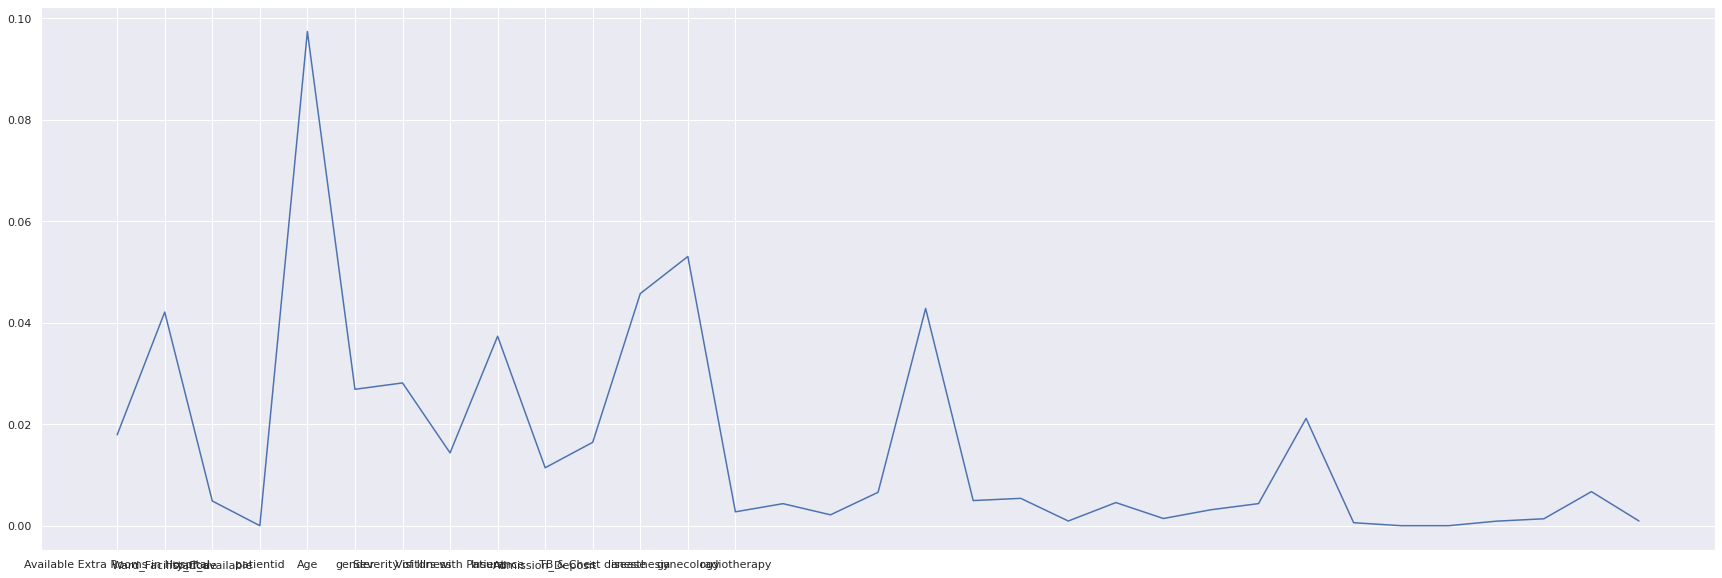

In [ ]:
plt.rcParams["figure.figsize"] = [30,10]
plt.plot(scores)
plt.xticks(np.arange(14),list(X.columns));